<h4><b>Introduction:</b></h4>

<h5>In this notebook we will develop and evaluate performance and predictive power of neural network on boston housing price dataset.</br> Here target is to determine the price of the property based on the features.</h5>

<h4><b>About the dataset:</b></h4>

<h5>
    The dataset used in this project comes from the UCI Machine Learning Repository. This data was collected in 1978 and each of the 506 entries represents aggregate information about 14 features of homes from various suburbs located in Boston.
    <br/>The features can be summarized as follows:<br/>
    <ul>
        <li>CRIM: This is the per capita crime rate by town</li>
        <li>ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.</li>
        <li>INDUS: This is the proportion of non-retail business acres per town.</li>
        <li>CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)</li>
        <li>NOX: This is the nitric oxides concentration (parts per 10 million)</li>
        <li>RM: This is the average number of rooms per dwelling</li>
        <li>AGE: This is the proportion of owner-occupied units built prior to 1940</li>
        <li>DIS: This is the weighted distances to five Boston employment centers</li>
        <li>RAD: This is the index of accessibility to radial highways</li>
        <li>TAX: This is the full-value property-tax rate per $1000</li>
        <li>PTRATIO: This is the pupil-teacher ratio by town</li>
        <li>B: This is calculated as $1000(B_k - 0.63)^2$, where $B_k$ is the proportion of people of African American descent by town</li>
        <li>LSTAT: This is the percentage lower status of the population</li>
        <li>MEDV: This is the median value of owner-occupied homes in $1000s</li>
    </ul>
</h5>

<h4><b>Importing libraries and dataset<b/></h4>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('boston_housing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
print(df.shape)

(506, 14)


In [4]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
MEDV       0
dtype: int64

In [5]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


<h4><b>Visualization<b/><h4/>

<Axes: xlabel='MEDV', ylabel='Count'>

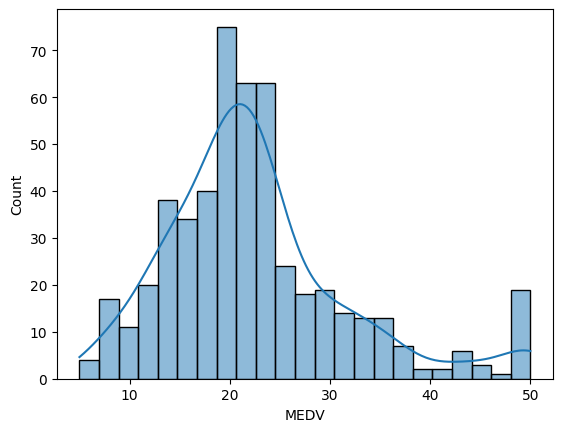

In [7]:
import seaborn as sns
sns.histplot(df['MEDV'], kde = True)

<Axes: ylabel='MEDV'>

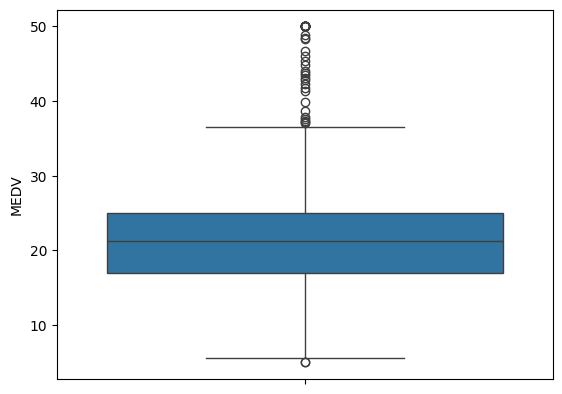

In [8]:
sns.boxplot(df['MEDV'])

In [9]:
corr = df.corr()
corr.loc['MEDV'].sort_values(ascending=False)

MEDV       1.000000
rm         0.695360
zn         0.360445
b          0.333461
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
lstat     -0.737663
Name: MEDV, dtype: float64

<Axes: >

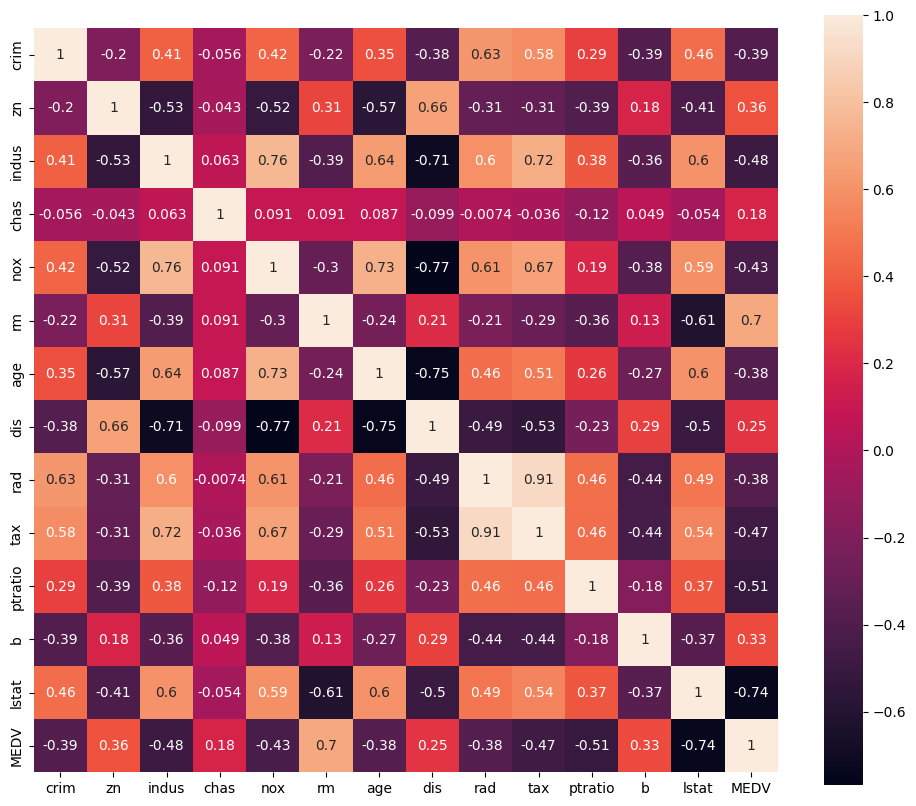

In [10]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=(12,10))
sns.heatmap(corr, square=True, annot=True)

<h4><b>Data Preprocessing</b></h4>

In [11]:
X = df.iloc[:, :-1]
y = df['MEDV']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<h4><b>Building the Model</b></h4>

<ul>
  <li>We are using Keras for developing the neural network.</li>
  <li>Models in Keras are defined as a sequence of layers.</li>
  <li>We create a Sequential model and add layers one at a time with activation function.</li>
  <li>Activation function decides whether a neuron should be activated or not by calculating weighted sum and adding bias with it.</li>
  <li>The purpose of the activation function is to introduce non-linearity into the output of a neuron.</li>
  <li>The activation we are using is relu.</li>
  <li>As this is a regression problem, the output layer has no activation function.</li>
  <li>Elements of neural network has input layer, hidden layer and output layer.</li>
  <li>Input layer: This layer accepts input features and passes them to the hidden layer.</li>
  <li>Hidden layer: This layer performs computations on the features from the input layer and transfers results to the output layer.</li>
  <li>Output layer: This layer brings up the information learned by the network to the outer world.</li>
  <li>Model Compilation: The compilation is the final step in creating a model before training.</li>
  <li>Optimizer: The optimizer we are using is adam.</li>
  <li>Adam is an optimization algorithm used instead of stochastic gradient descent to update weights based on training data.</li>
  <li>Loss: mean square error.</li>
</ul>


In [ ]:
import keras
from keras.layers import Dense
from keras.models import Sequential

model = Sequential()

model.add(Dense(128, activation='relu', input_dim=13))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

2025-05-03 07:13:54.028609: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-03 07:13:55.290394: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-03 07:13:57.730508: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746256440.820493    1979 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746256440.990271    1979 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746256441.806859    1979 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [15]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 588.5393
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 512.5858 
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 383.4258 
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 219.9361 
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 93.1564 
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 56.0873 
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 44.2900 
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28.2399 
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 22.8672 
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 19.1838 
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.9210 
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17.4184  
Epoch 13/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19.8273 
Epoch 14/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.9042 
Epoch 15/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

<h4><b>Evaluation of Model</b></h4>

In [16]:
y_pred = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [17]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.878424745162968


In [18]:
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print(rmse)

3.5629898817942136
